## Student Performace Prediction

## About dataset

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
Hours Studied: The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous tests.
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
Sleep Hours: The average number of hours of sleep the student had per day.
Sample Question Papers Practiced: The number of sample question papers the student practiced.
Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

## IMPORTING MODULES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [54]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Basic Info of Dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Shape of Dataset

In [56]:
df.shape

(10000, 6)

---
Observation - Total 10000 rows and 6 columns are present in dataset

---

## Statistical Description of Dataset

In [57]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Checking Missing Value and Handle Missing Value

In [58]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: >

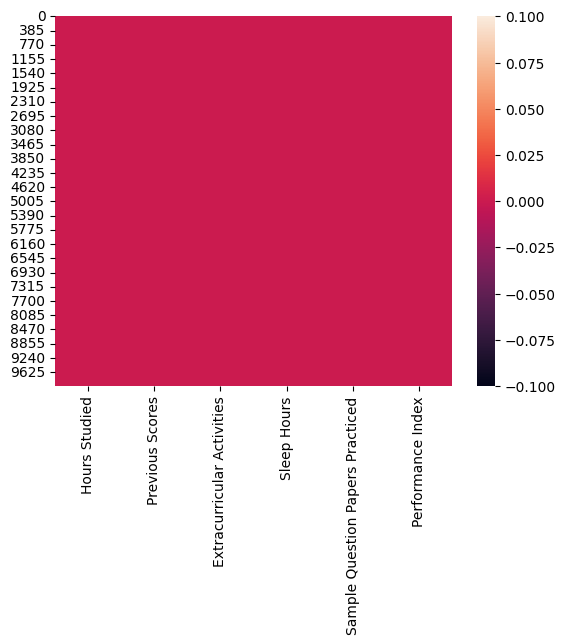

In [59]:
sns.heatmap(df.isnull())

---
Observation - No missing value found in Dataset

---

## Checking Features of dataset

In [60]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

---
Observation - There are total 6 features including output 

---

## Checking datatype of features

In [61]:
for i in df.columns:
    print("Datatype of " , i , "column is " , df[i].dtype)

Datatype of  Hours Studied column is  int64
Datatype of  Previous Scores column is  int64
Datatype of  Extracurricular Activities column is  object
Datatype of  Sleep Hours column is  int64
Datatype of  Sample Question Papers Practiced column is  int64
Datatype of  Performance Index column is  float64


## Checking unique values in all Features

In [62]:
for i in df.columns:
    print("Unique value in " , i , "column is " , df[i].unique())
    print()

Unique value in  Hours Studied column is  [7 4 8 5 3 6 2 1 9]

Unique value in  Previous Scores column is  [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]

Unique value in  Extracurricular Activities column is  ['Yes' 'No']

Unique value in  Sleep Hours column is  [9 4 7 5 8 6]

Unique value in  Sample Question Papers Practiced column is  [1 2 5 6 0 8 3 4 9 7]

Unique value in  Performance Index column is  [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  1

## Checking Outliers using Boxplot

<Axes: ylabel='Hours Studied'>

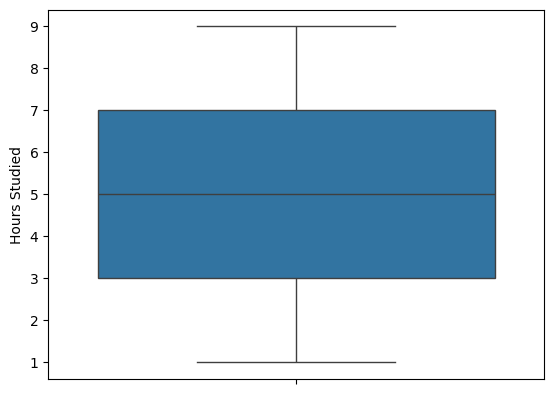

In [63]:
#cheking outlier in Hours studied feature
sns.boxplot(data = df['Hours Studied'])

<Axes: ylabel='Previous Scores'>

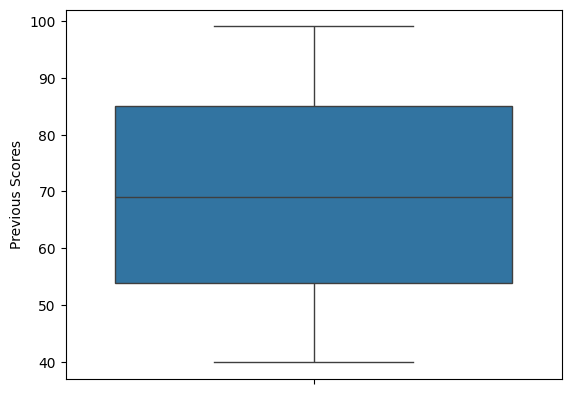

In [64]:
#cheking outlier in Previous score feature
sns.boxplot(data = df['Previous Scores'])

## Segergate Numerical and Categorical Features

In [65]:
columns = df.columns
num_col = []
cat_col = []

for i in columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

print("Categorical columns are : " , cat_col)
print("Numerical columns are : " , num_col)

Categorical columns are :  ['Extracurricular Activities']
Numerical columns are :  ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


## Encoding Categorical Columns


In [68]:
df['Extracurricular Activities']=df['Extracurricular Activities'].str.replace('Yes' ,'1')
df['Extracurricular Activities']=df['Extracurricular Activities'].str.replace('No' ,'0')

In [70]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

## Divide Dataset into Dependent and Independent Features

In [73]:
X = df.iloc[:,:-1]  #independent feature
y = df.iloc[:,-1]  #dependent feature

## Train Test split

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [75]:
#checking shape of train and test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6700, 5), (3300, 5), (6700,), (3300,))

## Standardization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [78]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train) 

LinearRegression()

## Model Testing

In [79]:
y_predict_data = regression.predict(X_test_scaled)
y_predict_data

array([41.46134147, 26.77777382, 34.28057243, ..., 46.12638647,
       46.2500866 , 51.4472275 ])

## Checking Model Acuuracy

In [80]:
#R squared
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict_data)
score

0.9889834302888386

In [81]:
#Adjusted R squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9889667081125921

## Pickle the model

In [82]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb')) #for standardization
pickle.dump(regression,open('regression.pkl','wb')) #for model 

## Loading and use Pickle file

In [83]:
my_regression = pickle.load(open('regression.pkl','rb'))
my_regression.predict(X_test_scaled)

array([41.46134147, 26.77777382, 34.28057243, ..., 46.12638647,
       46.2500866 , 51.4472275 ])

In [84]:
my_scaler = pickle.load(open('scaler.pkl','rb'))
my_regression.predict(my_scaler.transform(X_test))

array([41.46134147, 26.77777382, 34.28057243, ..., 46.12638647,
       46.2500866 , 51.4472275 ])